In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(19.7,8.27)})

In [3]:
# Reading MAL data which have high intesity product deatils for every company . 
# We will read the mal account and drop out unimportant columns 

# Read mal account in dataframe
mal_df   = pd.read_csv('../data/mal_high/mal_data.csv')

# Selecting important columns for analysis 
df = pd.read_csv('../data/mal_high/column_choice.csv')
important_cols = list(df[df['choose'] == 1]['Variable_nam'].values)
mal_data_df = mal_df[important_cols]

# Analysis on Vendor and topic(tech services)



The first level of analysis is done between vendor and topic .
Since "vendor" columns defines the domain name of the organisation or we can say it represnts the org.
and on other hand "topic"  column contains the actual tech services names that provided by the vendors.


On Analysis of vendor and topic found that majority of Vendors provide single tech services as out of 4624 diffrent vendors there are 4118 vendors having single topic 

And out of 506 vendors which provides more than single tech services ,following are the top 10 vendors with maxiumum topics.

    1. oracle.com 323 services
    2. ibm.com	217 services
    3. wordpress.org 187 services
    4. sap.com	158 services
    5. google.com	142 services
    6. microfocus.com	115 services
    7. microsoft.com	111 services
    8. themeforest.net	109 services
    9. hpe.com	104 services
    10. amazon.com	89 services

 



In [4]:
# Reading the slice of data into new dataframe
vendor_topic_df = mal_data_df[['vendor','topic']]

In [6]:
# Finding the mapping of topic with vendors1. oracle.com 323 services

vendor_topic_combo =  list(vendor_topic_df.groupby(by=['vendor','topic']).count().index)

#Saving the mapping to csv file
vendor_data_df = pd.DataFrame(vendor_topic_combo,columns=['vendor','topic'])
#vendor_data_df.to_csv('../mal_high/output_data/vendor_topic_relation.csv',index=False)

In [7]:
#Getting group of vendors 
df = vendor_data_df.groupby(by="vendor",as_index=False).count()

# Getting all the unique counts topics 
x = df['topic'].unique()

# Getting the count of vendors which has 
df[df['topic'] > 1].sort_values(['topic'],ascending=False).count()

vendor    506
topic     506
dtype: int64

In [214]:
df.sort_values(['topic'],ascending=False).head(20)

vendor  topic
2957       oracle.com    323
1931          ibm.com    217
4471    wordpress.org    187
3471          sap.com    158
1758       google.com    142
2599   microfocus.com    115
2604    microsoft.com    111
3994  themeforest.net    109
1901          hpe.com    104
265        amazon.com     89
1712       github.com     82
675            ca.com     69
2182       jquery.com     66
4331       vmware.com     63
812         cisco.com     56
1357          emc.com     51
1998        infor.com     41
140         adobe.com     37
3576      shopify.com     36
3882     symantec.com     36


# Analysis on category,subcategory of products(topic)


Since we have insight on vendors and their tech services, we now have get an understanding of type of tech or topic.

Category and subcateory together can be used to define the type of topic(tech services)

But before getting an insight on types of tech services , we need to understand and get a better understanding of what categories and subcategory are there and how category are realated to subcategory

In [49]:
# Reading the category and subcategory deatils 

cat_subcat_df = mal_data_df[['category','subcategory']]

In [56]:
# Getting diffrent category of tech
cat_subcat_df.category.unique()


array(['CRM & RELATED', 'IT INFRASTRUCTURE', 'SECURITY',
       'CONTENT MANAGEMENT SYSTEMS', 'DIGITAL ADVERTISING', 'ANALYTICS',
       'DEVELOPMENT', 'IT MANAGEMENT', 'ERP',
       'VERTICAL INDUSTRY SOFTWARE', 'E-COMMERCE', 'HR',
       'CYBERSECURITY SERVICES', 'PROFESSIONAL SERVICES', 'CAD & PLM',
       'STORAGE', 'MARKETING SERVICES', 'BUSINESS SERVICES',
       'COLLABORATION & PRODUCTIVITY', 'HOSTING SERVICES',
       'ARTIFICIAL INTELLIGENCE', 'SUPPLY CHAIN & LOGISTICS',
       'SOFTWARE DEFINED', 'IT SECURITY', 'IOT MANAGEMENT', 'AR/VR',
       'GOVERNANCE,RISK & COMPLIANCE', 'TRANSLATION SERVICES', 'SERVERS'],
      dtype=object)

 Diffrent kind of product category we have?
 
 There are 29 diffrent category of tech services those are 
 
     'CRM & RELATED',
     'IT INFRASTRUCTURE',
     'SECURITY',
     'CONTENT MANAGEMENT SYSTEMS',
     'DIGITAL ADVERTISING',
     'ANALYTICS',
     'DEVELOPMENT',
     'IT MANAGEMENT',
     'ERP',
     'VERTICAL INDUSTRY SOFTWARE',
     'E-COMMERCE',
     'HR',
     'CYBERSECURITY SERVICES',
     'PROFESSIONAL SERVICES',
     'CAD & PLM',
     'STORAGE',
     'MARKETING SERVICES',
     'BUSINESS SERVICES',
     'COLLABORATION & PRODUCTIVITY',
     'HOSTING SERVICES',
     'ARTIFICIAL INTELLIGENCE',
     'SUPPLY CHAIN & LOGISTICS',
     'SOFTWARE DEFINED',
     'IT SECURITY',
     'IOT MANAGEMENT',
     'AR/VR',
     'GOVERNANCE,RISK & COMPLIANCE',
     'TRANSLATION SERVICES',
     'SERVERS'

In [61]:
    
# Finding most common category 
cat_subcat_df.groupby(by='category',as_index=False).count().sort_values(['subcategory'],ascending=False)

category  subcategory
9                    DEVELOPMENT      1627744
17             IT INFRASTRUCTURE      1004892
7                  CRM & RELATED       574024
10           DIGITAL ADVERTISING       541798
6     CONTENT MANAGEMENT SYSTEMS       455755
22                      SECURITY       273860
0                      ANALYTICS       241068
18                 IT MANAGEMENT       233394
12                           ERP       207576
5   COLLABORATION & PRODUCTIVITY       167906
4                      CAD & PLM       167608
21         PROFESSIONAL SERVICES       145071
11                    E-COMMERCE       102686
28    VERTICAL INDUSTRY SOFTWARE        96838
8         CYBERSECURITY SERVICES        80381
15                            HR        73501
20            MARKETING SERVICES        64220
14              HOSTING SERVICES        22640
26      SUPPLY CHAIN & LOGISTICS        19050
2        ARTIFICIAL INTELLIGENCE        15867
24              SOFTWARE DEFINED         5913
3              BUSINESS SERVICES         5259
13  GOVERNANCE,RISK & COMPLIANCE         4408
19                   IT SECURITY         3307
23                       SERVERS         2806
27          TRANSLATION SERVICES         1210
16                IOT MANAGEMENT         1187
1                          AR/VR         1127
25                       STORAGE          157

In [240]:
#%%time
mal_data_df[(mal_data_df['category'] == 'DEVELOPMENT') & (mal_data_df['subcategory']== 'CONTINUOUS DELIVERY SOFTWARE')]\
                                    .groupby(['vendor','topic'],as_index= False).count()\
                                    .sort_values('global_url',ascending = False).head(30)

vendor                                              topic  \
52        jenkins.io                                            JENKINS   
17     cloudbees.com                                  CLOUDBEES JENKINS   
63     microsoft.com                                      MICROSOFT TFS   
3        ansible.com                                            ANSIBLE   
53     jetbrains.com                                           TEAMCITY   
27     hashicorp.com                                HASHICORP TERRAFORM   
56    microfocus.com        MICRO FOCUS CONFIGURATION MANAGEMENT SYSTEM   
70           sap.com                               SAP SOLUTION MANAGER   
61    microfocus.com                            PVCS PROFESSIONAL SUITE   
24        github.com                               BLOODHOUND TYPEAHEAD   
67        puppet.com                                        PUPPET LABS   
13            ca.com                                     CA ENDEVOR SCM   
39  httpd.apache.org                                     MOD_SSL 2.2.22   
9             ca.com                                            AUTOMIC   
50           ibm.com                             IBM RATIONAL CLEARCASE   
25        google.com  COMPUTE ENGINE MANAGEMENT WITH PUPPET, CHEF, S...   
42  httpd.apache.org                                     MOD_SSL 2.2.25   
41  httpd.apache.org                                     MOD_SSL 2.2.24   
71        serena.com                            SERENA BUSINESS MANAGER   
69     saltstack.com                                          SALTSTACK   
33  httpd.apache.org                                     MOD_SSL 2.2.15   
35  httpd.apache.org                                     MOD_SSL 2.2.17   
66      pubmatic.com                                  PUBMATIC RESELLER   
38  httpd.apache.org                                     MOD_SSL 2.2.21   
45  httpd.apache.org                                      MOD_SSL 2.2.9   
40  httpd.apache.org                                     MOD_SSL 2.2.23   
77   tortoisesvn.net                                        TORTOISESVN   
15      cfengine.com                                           CFENGINE   
4         apache.org                                     MOD_SSL 2.8.31   
8            bmc.com                                        BMC MARIMBA   

     tpid  category  subcategory  dm_country  state  areaname  subsidiaryname  \
52  10659     10659        10659       10659  10642     10659           10659   
17  10647     10647        10647       10647  10642     10647           10647   
63   8540      8540         8540        8540   8540      8540            8540   
3    4364      4364         4364        4364   4364      4364            4364   
53   1776      1776         1776        1776   1776      1776            1776   
27   1252      1252         1252        1252   1252      1252            1252   
56   1263      1263         1263        1263   1263      1263            1263   
70   1206      1206         1206        1206   1206      1206            1206   
61   1171      1171         1171        1171   1171      1171            1171   
24   1143      1143         1143        1143      0      1143            1143   
67   1118      1118         1118        1118   1118      1118            1118   
13    808       808          808         808    808       808             808   
39    772       772          772         772      0       772             772   
9     640       640          640         640    640       640             640   
50    618       618          618         618    618       618             618   
25    594       594          594         594    594       594             594   
42    563       563          563         563      0       563             563   
41    537       537          537         537      0       537             537   
71    491       491          491         491    491       491             491   
69    437       437          437         437    437       437       

The top 10 common categories that org uses are :

    1.    DEVELOPMENT	 1627744
    2.    IT INFRASTRUCTURE	 1004892
    3.    CRM & RELATED	 574024
    4.    DIGITAL ADVERTISING	 541798
    5.    CONTENT MANAGEMENT SYSTEMS	 455755
    6.    SECURITY	 273860
    7.    ANALYTICS	 241068
    8.    IT MANAGEMENT	 233394
    9.    ERP	 207576
    10.    COLLABORATION & PRODUCTIVITY	 167906


Now analysing these category to check what kind of subcategory they have


On analysis only category and sub category found out that most of the org are using products which are categorised under Devlopment under  this category org tend  to use to WEB FRAMEWORKS SOFTWARE, WEB TECHNOLOGY ,  APPLICATION DEVELOPMENT SOFTWARE & PROGRAMMING LANGUAGE. 

Apart from development products, org are also highly focued on using IT INFRASTRUCTURE products.

And under IT infrastructure , org use DATABASE SOFTWARE ,INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS,OPERATING SYSTEM, DATA INTEGRATION SOFTWARE,APPLICATION SERVER SOFTWARE.


If we compare the top categories with cloud based category list i.e ( ['STORAGE',
 'SERVERS',
 'HOSTING SERVICES',
 'CONTENT MANAGEMENT SYSTEMS',
 'IT INFRASTRUCTURE',
 'ARTIFICIAL INTELLIGENCE',
 'DEVELOPMENT',
 'ANALYTICS'])

we find that Development , IT Infrastructure, Analytics and CONTENT MANAGEMENT SYSTEMS are important ones.

Not only that if decend dow to subcategory level and check for cloud based sub category list i.e(['APPLICATION RELEASE ORCHESTRATION SOFTWARE',
 'TRANSACTIONAL EMAIL SOFTWARE',
 'EMAIL SOFTWARE',
 'AI PLATFORMS SOFTWARE',
 'EMAIL VERIFICATION SOFTWARE',
 'APPLICATION DEVELOPMENT SOFTWARE',
 'MACHINE LEARNING SOFTWARE',
 'DATA WAREHOUSE SOFTWARE',
 'SERVER VIRTUALIZATION SOFTWARE',
 'DATABASE SOFTWARE',
 'ENTERPRISE SEARCH SOFTWARE',
 'CONTAINERIZATION SOFTWARE',
 'STORAGE MANAGEMENT SOFTWARE',
 'LOAD BALANCING SOFTWARE',
 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE',
 'CONTINUOUS DELIVERY SOFTWARE',
 'WEB ACCELERATOR SOFTWARE',
 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE',
 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS'])
 
 
 
 We find the under "Develpoment" category most of org have used following subcategory products
  1. 'APPLICATION DEVELOPMENT SOFTWARE', 
  2. 'CONTINUOUS DELIVERY SOFTWARE',
  3.         'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE',
  4.        'APPLICATION RELEASE ORCHESTRATION SOFTWARE',
  5.        'MACHINE LEARNING SOFTWARE'
 
 
Under "IT INFRASTRUCTURE" 

1. 'DATABASE SOFTWARE',
2.       'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS',
3.      'SERVER VIRTUALIZATION SOFTWARE',
4.       'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE',
5.       'WEB ACCELERATOR SOFTWARE',
6. 'CONTAINERIZATION SOFTWARE',
7.       'STORAGE MANAGEMENT SOFTWARE', 
8. 'DATA WAREHOUSE SOFTWARE',
9.       'LOAD BALANCING SOFTWARE', 
10. 'TRANSACTIONAL EMAIL SOFTWARE',
11.       'EMAIL SOFTWARE', 
12. 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE',
13.       'CONTINUOUS DELIVERY SOFTWARE'


Under "ANALYTICS":
1. 'ENTERPRISE SEARCH SOFTWARE'



Under "CONTENT MANAGEMENT SYSTEMS"
1. APPLICATION DEVELOPMENT SOFTWARE


Conclusion : 

1. For predcting cloud spend of any org , most contributing/important categories to look out are IT INFRASTRUCTURE,DEVELOPMENT and CONTENT MANAGEMENT SYSTEMS	

2. Under subcategory data most important ones for cloud spend prediction are APPLICATION DEVELOPMENT SOFTWARE,EMAIL SOFTWARE,MACHINE LEARNING SOFTWARE	

In [111]:
sub_list= ['APPLICATION RELEASE ORCHESTRATION SOFTWARE',
 'TRANSACTIONAL EMAIL SOFTWARE',
 'EMAIL SOFTWARE',
 'AI PLATFORMS SOFTWARE',
 'EMAIL VERIFICATION SOFTWARE',
 'APPLICATION DEVELOPMENT SOFTWARE',
 'MACHINE LEARNING SOFTWARE',
 'DATA WAREHOUSE SOFTWARE',
 'SERVER VIRTUALIZATION SOFTWARE',
 'DATABASE SOFTWARE',
 'ENTERPRISE SEARCH SOFTWARE',
 'CONTAINERIZATION SOFTWARE',
 'STORAGE MANAGEMENT SOFTWARE',
 'LOAD BALANCING SOFTWARE',
 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE',
 'CONTINUOUS DELIVERY SOFTWARE',
 'WEB ACCELERATOR SOFTWARE',
 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE',
 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS']

cat_list = ['STORAGE',
 'SERVERS',
 'HOSTING SERVICES',
 'CONTENT MANAGEMENT SYSTEMS',
 'IT INFRASTRUCTURE',
 'ARTIFICIAL INTELLIGENCE',
 'DEVELOPMENT',
 'ANALYTICS']

In [121]:
# finding out the cloud relations
data_df [(data_df['category'] == 'CONTENT MANAGEMENT SYSTEMS') & \
         (data_df['subcategory'].isin(sub_list))]\
        .subcategory.values

array(['APPLICATION DEVELOPMENT SOFTWARE'], dtype=object)

In [120]:
data_df [(data_df['subcategory'].isin(sub_list))].groupby(by = 'subcategory',as_index=False)\
                                                .count().sort_values(['global_url'],ascending=False)

subcategory  category  global_url
1                    APPLICATION DEVELOPMENT SOFTWARE         8           8
9                                      EMAIL SOFTWARE         4           4
13                          MACHINE LEARNING SOFTWARE         3           3
4         CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE         2           2
6                        CONTINUOUS DELIVERY SOFTWARE         2           2
11       INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS         1           1
16                       TRANSACTIONAL EMAIL SOFTWARE         1           1
15                        STORAGE MANAGEMENT SOFTWARE         1           1
14                     SERVER VIRTUALIZATION SOFTWARE         1           1
12                            LOAD BALANCING SOFTWARE         1           1
0                               AI PLATFORMS SOFTWARE         1           1
10                         ENTERPRISE SEARCH SOFTWARE         1           1
8                                   DATABASE SOFTWARE         1           1
7                             DATA WAREHOUSE SOFTWARE         1           1
5                           CONTAINERIZATION SOFTWARE         1           1
3          APPLICATION RELEASE ORCHESTRATION SOFTWARE         1           1
2   APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE         1           1
17                           WEB ACCELERATOR SOFTWARE         1           1

In [71]:
# mapping category with distribution of sub category products 
mapping_cat_subcat =list(cat_subcat_df.groupby(by=['category','subcategory']).count().index)

category_subcat_map_df = pd.DataFrame(mapping_cat_subcat,columns=['category','subcategory'])

mapping_data = []
for category in cat_subcat_df.category.unique():
    
    count_map = (category , category_subcat_map_df[category_subcat_map_df['category']== category].subcategory.count())
    mapping_data.append(count_map)
    
# Converting the mapping to dataframe
df = pd.DataFrame( mapping_data,columns=['category','subcat_count'])

# finding the count subcategories in each 29 category products
df.sort_values(['subcat_count'],ascending=False)


# Checking what kind of sub category products are most used by diffrent orgs

data_df = mal_data_df.groupby(by=['category','subcategory'],as_index=False).\
            global_url.count().sort_values(['global_url'],ascending=False)

data_df.head(50)


# Analysis on Vendor, topic, category, subcategory

In [158]:

# Reading the vendor, topic , category and subcategory deatils 

vendor_service_df = mal_data_df[['vendor','topic','category','subcategory','global_url']]

In [159]:
df = vendor_service_df.groupby(by=['vendor','topic','category','subcategory'],as_index=False).count()

In [179]:
# check what kind of tech services top vendors are providing 
# oracle.com , ibm.com ,wordpress.org,sap.com , google.com , microfocus.com,microsoft.com,themeforest.net,
#hpe.com , amazon.com
df[(df.vendor == 'microsoft.com') & (df.category == 'IT INFRASTRUCTURE')].sort_values('global_url',ascending=False).head(15)

vendor                                    topic  \
4523  microsoft.com                          MICROSOFT AZURE   
4571  microsoft.com   MICROSOFT SQL SERVER MANAGEMENT STUDIO   
4575  microsoft.com                  MICROSOFT SYSTEM CENTER   
4572  microsoft.com  MICROSOFT SQL SERVER REPORTING SERVICES   
4567  microsoft.com                     MICROSOFT SQL SERVER   
4518  microsoft.com                         MICROSOFT ACCESS   
4594  microsoft.com                             TRANSACT-SQL   
4554  microsoft.com                 MICROSOFT HYPER-V SERVER   
4598  microsoft.com                      WINDOWS SERVER 2003   
4597  microsoft.com                      WINDOWS SERVER 2000   
4579  microsoft.com           MICROSOFT SYSTEM CENTER OPSMGR   
4526  microsoft.com             MICROSOFT AZURE BLOB STORAGE   
4521  microsoft.com                          MICROSOFT APP-V   
4522  microsoft.com           MICROSOFT APPLICATION INSIGHTS   
4550  microsoft.com                         MICROSOFT FOXPRO   

               category                                        subcategory  \
4523  IT INFRASTRUCTURE       INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS   
4571  IT INFRASTRUCTURE                          DATA INTEGRATION SOFTWARE   
4575  IT INFRASTRUCTURE  APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE   
4572  IT INFRASTRUCTURE                                  DATABASE SOFTWARE   
4567  IT INFRASTRUCTURE                                  DATABASE SOFTWARE   
4518  IT INFRASTRUCTURE                                  DATABASE SOFTWARE   
4594  IT INFRASTRUCTURE                                  DATABASE SOFTWARE   
4554  IT INFRASTRUCTURE                     SERVER VIRTUALIZATION SOFTWARE   
4598  IT INFRASTRUCTURE                        APPLICATION SERVER SOFTWARE   
4597  IT INFRASTRUCTURE                        APPLICATION SERVER SOFTWARE   
4579  IT INFRASTRUCTURE  APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE   
4526  IT INFRASTRUCTURE       INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS   
4521  IT INFRASTRUCTURE                     SERVER VIRTUALIZATION SOFTWARE   
4522  IT INFRASTRUCTURE       INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS   
4550  IT INFRASTRUCTURE                                  DATABASE SOFTWARE   

      global_url  
4523       38515  
4571       27376  
4575       15415  
4572       13755  
4567       12438  
4518       10620  
4594        9424  
4554        7911  
4598        4989  
4597        4911  
4579        3903  
4526        1866  
4521        1777  
4522        1626  
4550        1107

In [215]:
vendor_list = ['oracle.com' , 'ibm.com' ,'wordpress.org','sap.com' , 'google.com' , 'microfocus.com','microsoft.com',
'themeforest.net','hpe.com' , 'amazon.com','github.com','ca.com','jquery.com','vmware.com','cisco.com',
              'emc.com','infor.com','adobe.com','shopify.com','symantec.com']


for vendor_name  in vendor_list:
    print(vendor_name)
    y1 = mal_data_df[mal_data_df['vendor'] == vendor_name].groupby(['topic','category'],as_index = False).count()\
                                    .sort_values('global_url',ascending = False)

    print(y1.groupby('category',as_index=False).count().sort_values('vendor',ascending=False)[['category','topic']])
    print()

oracle.com
                        category  topic
9                            ERP     62
13             IT INFRASTRUCTURE     58
12                            HR     44
5                  CRM & RELATED     44
22    VERTICAL INDUSTRY SOFTWARE     24
21      SUPPLY CHAIN & LOGISTICS     11
6                    DEVELOPMENT     11
14                 IT MANAGEMENT     11
18                       SERVERS      9
17                      SECURITY      9
0                      ANALYTICS      8
4     CONTENT MANAGEMENT SYSTEMS      7
8                     E-COMMERCE      5
7            DIGITAL ADVERTISING      4
15            MARKETING SERVICES      3
16         PROFESSIONAL SERVICES      3
3   COLLABORATION & PRODUCTIVITY      2
20                       STORAGE      2
2                      CAD & PLM      2
1        ARTIFICIAL INTELLIGENCE      1
10  GOVERNANCE,RISK & COMPLIANCE      1
19              SOFTWARE DEFINED      1
11              HOSTING SERVICES      1

ibm.com
                    

                     category  topic
1               CRM & RELATED     12
2                 DEVELOPMENT     12
0  CONTENT MANAGEMENT SYSTEMS      4
3         DIGITAL ADVERTISING      4
5                          HR      2
4                         ERP      1
6           IT INFRASTRUCTURE      1
7          MARKETING SERVICES      1

shopify.com
             category  topic
1          E-COMMERCE     31
0       CRM & RELATED      4
2  MARKETING SERVICES      1

symantec.com
                     category  topic
6               IT MANAGEMENT     15
7                    SECURITY     11
2                 DEVELOPMENT      2
3         DIGITAL ADVERTISING      2
4                         ERP      2
0                   ANALYTICS      1
1      CYBERSECURITY SERVICES      1
5           IT INFRASTRUCTURE      1
8  VERTICAL INDUSTRY SOFTWARE      1



Conclusion :

1. The large vendors which have more than 30-50 topic(tech services) are mostly having large number of Development , IT infrastructure , Content managmnet system products. 

2. On other hand orgs are hsve mostly used Development products followed by IT INFRASTRUCTURE prodcuts.

3. on deep diving into the type of topic(tech services) , we can concur that orgs have mostly used Web development products and most of orgs  using services from vendors like , jquery.com, microsoft.com



In [263]:
mal_data_df.groupby(['vendor','topic','category']).count()\
                                    .sort_values('vendor')\
                                    [['global_url']]

global_url
vendor             topic          category                              
1000mercis.com     1000MERCIS     DIGITAL ADVERTISING                 35
100tb.com          100TB          IT INFRASTRUCTURE                    2
123contactform.com 123CONTACTFORM CRM & RELATED                       29
161media.com       161MEDIA       DIGITAL ADVERTISING                739
1dmp.io            1DMP           DIGITAL ADVERTISING                185
...                                                                  ...
zycus.com          ZYCUS          ERP                                 55
zylab.com          ZYLAB          VERTICAL INDUSTRY SOFTWARE          16
zynxhealth.com     ZYNX           VERTICAL INDUSTRY SOFTWARE          80
zywave.com         ZYWAVE         VERTICAL INDUSTRY SOFTWARE          13
zyxel.com          ZYXEL          SECURITY                            69

[8235 rows x 1 columns]

Looking form topic point of view orgs have used 

1. google.com	GOOGLE ANALYTICS	57277
2. microsoft.com	ASP.NET	54538
3. php.net	PHP	53608
4. jquery.com	JQUERY	42735
5. microsoft.com	MICROSOFT SHAREPOINT ENTERPRISE	40963
6. google.com	VIEWPORT META	39881
7. microsoft.com	MICROSOFT AZURE	38515
8.	interpublic.com	IPHONE / MOBILE COMPATIBLE	37714
9.	opensource.org	LINUX	37498
10.	openspf.org	SPF	36830
11.	w3.org	MAX WIDTH	34894

# Analysis on organization level

In [54]:
org_df = mal_data_df.groupby(by =['global_url'],as_index=False).count().sort_values('vendor',ascending=False).tail(10)

In [55]:
org_df['global_url'].values

array(['svitzer.com', 'midlandbankbd.net', 'forsyth.nc.us', 'apotek1.no',
       'metropolitanlife.ro', 'super-yamanaka.co.jp', 'super-mill.com.tw',
       'sunspring.com.tw', 'metaps.com', 'amberg.ch'], dtype=object)

 ORG : svitzer.com


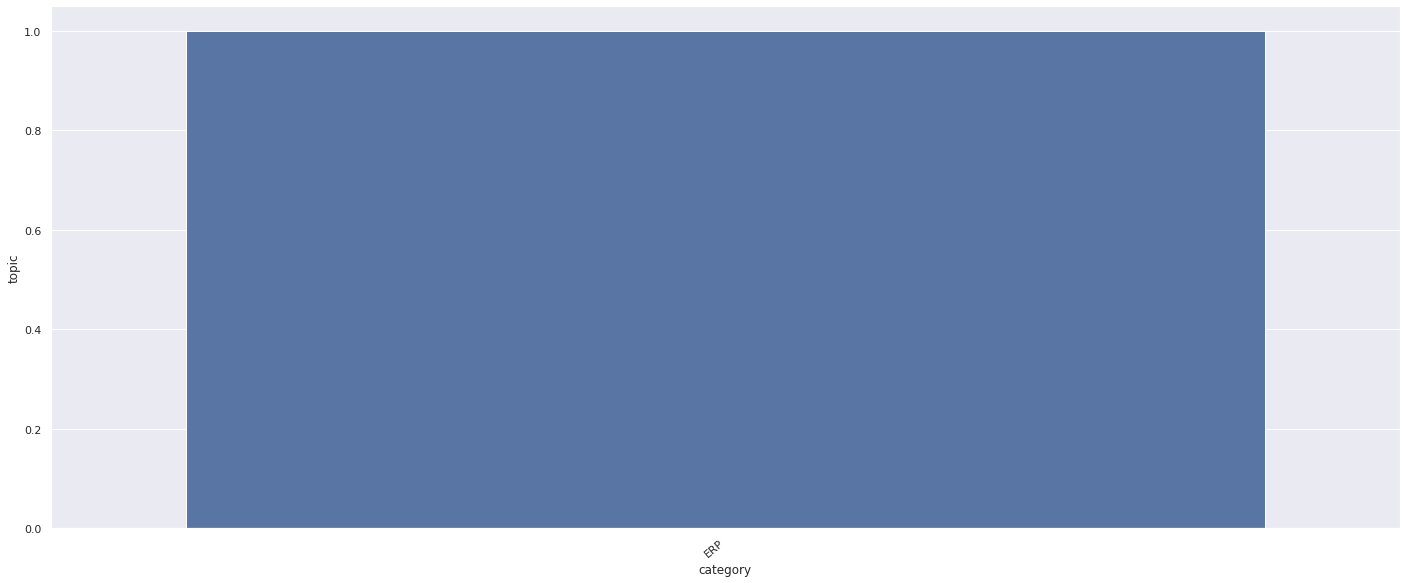


 ORG : midlandbankbd.net


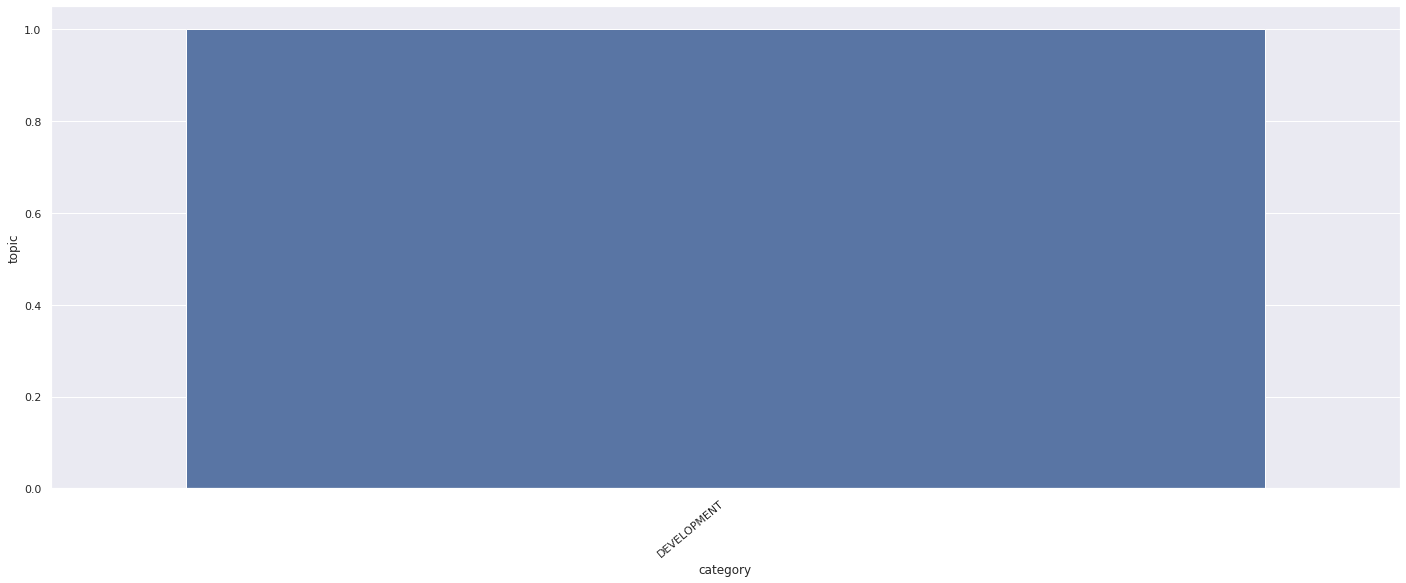


 ORG : forsyth.nc.us


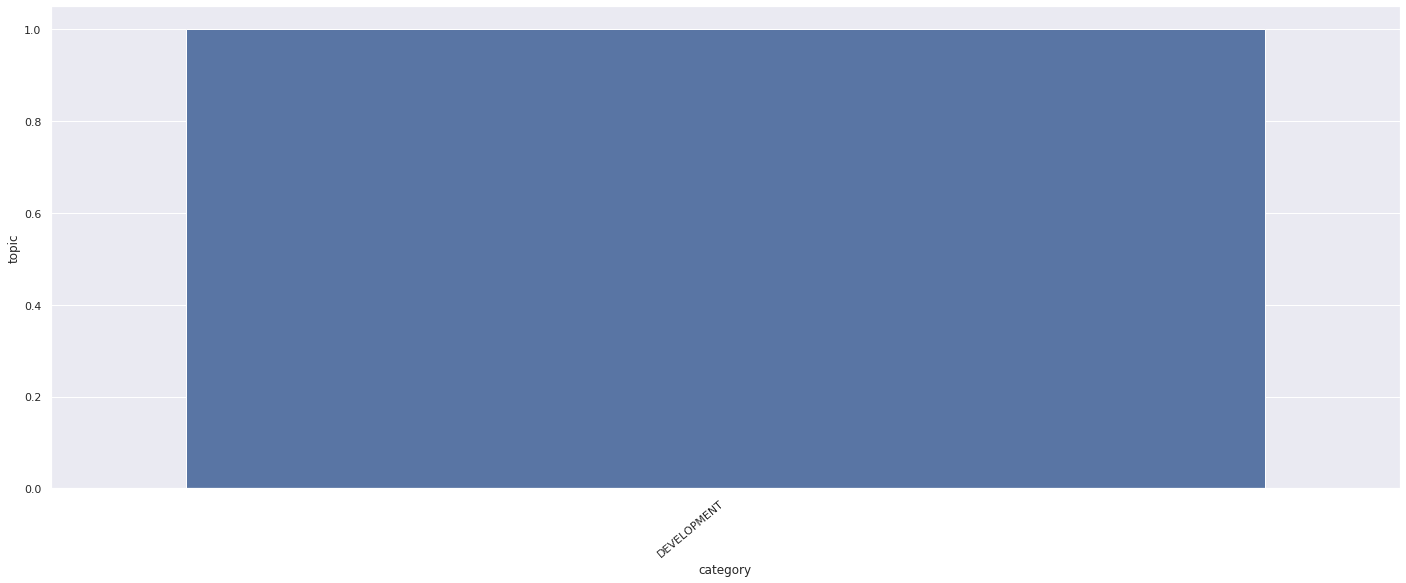


 ORG : apotek1.no


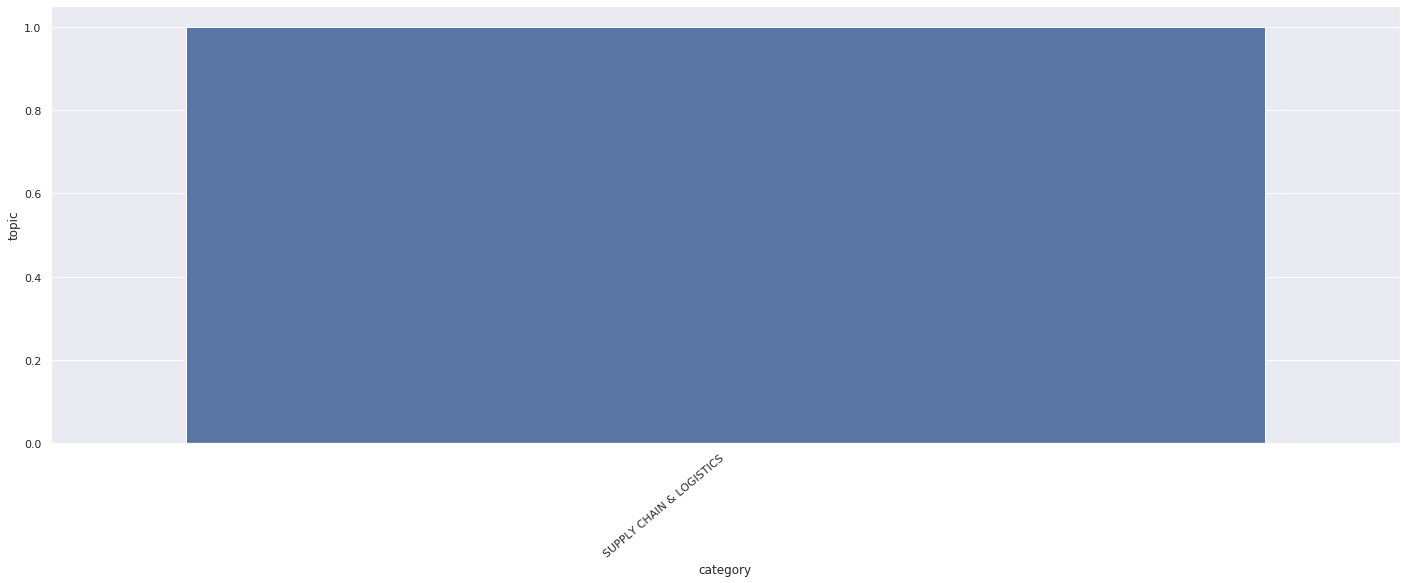


 ORG : metropolitanlife.ro


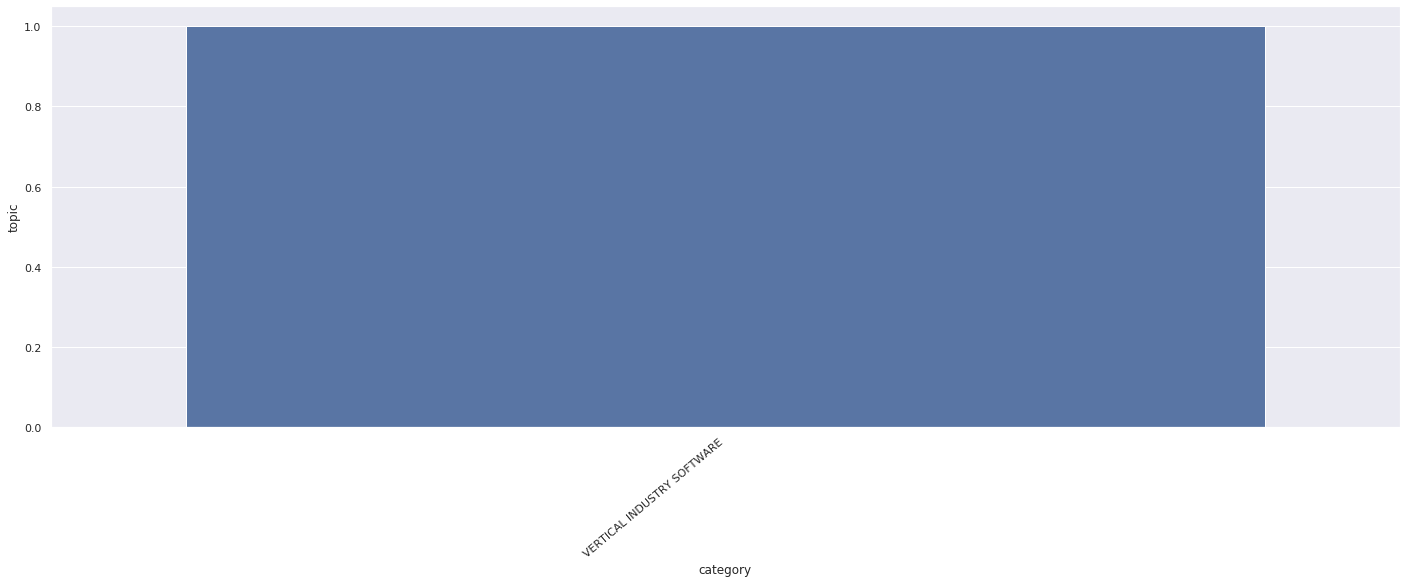


 ORG : super-yamanaka.co.jp


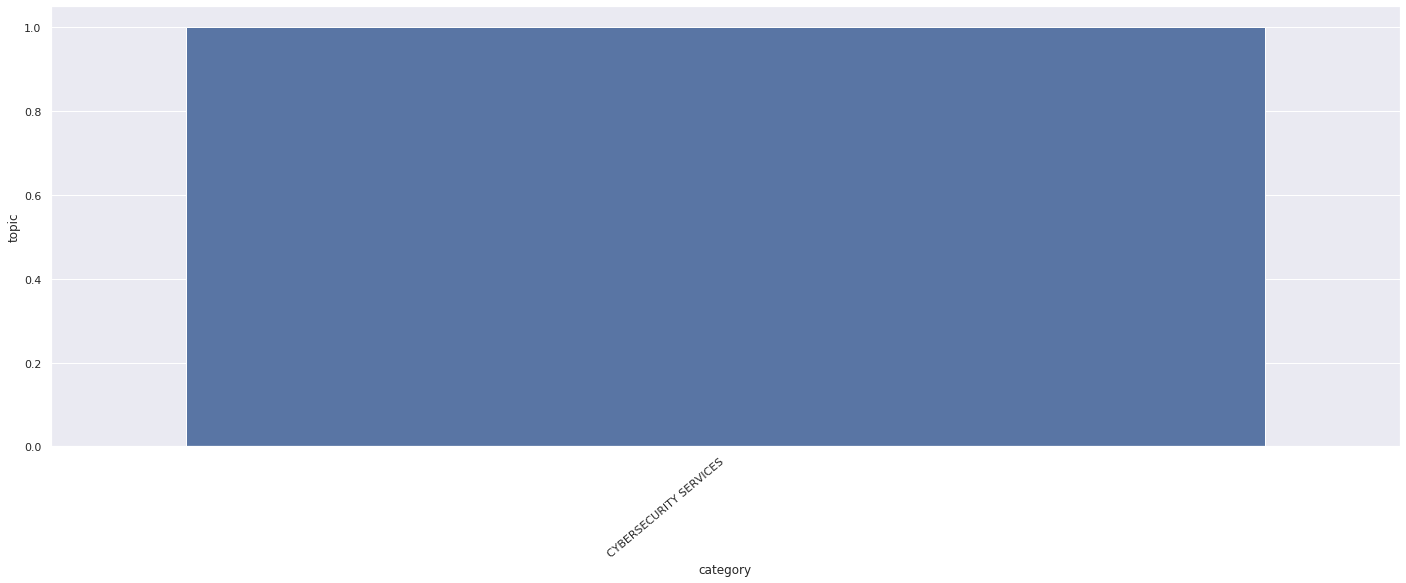


 ORG : super-mill.com.tw


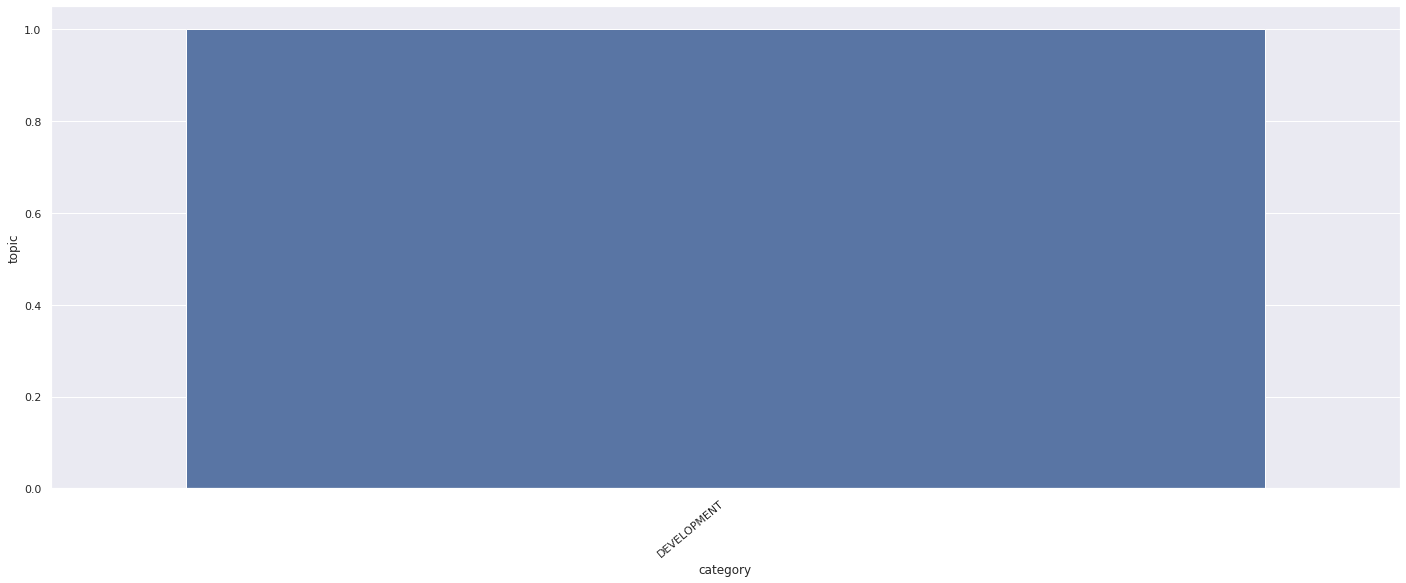


 ORG : sunspring.com.tw


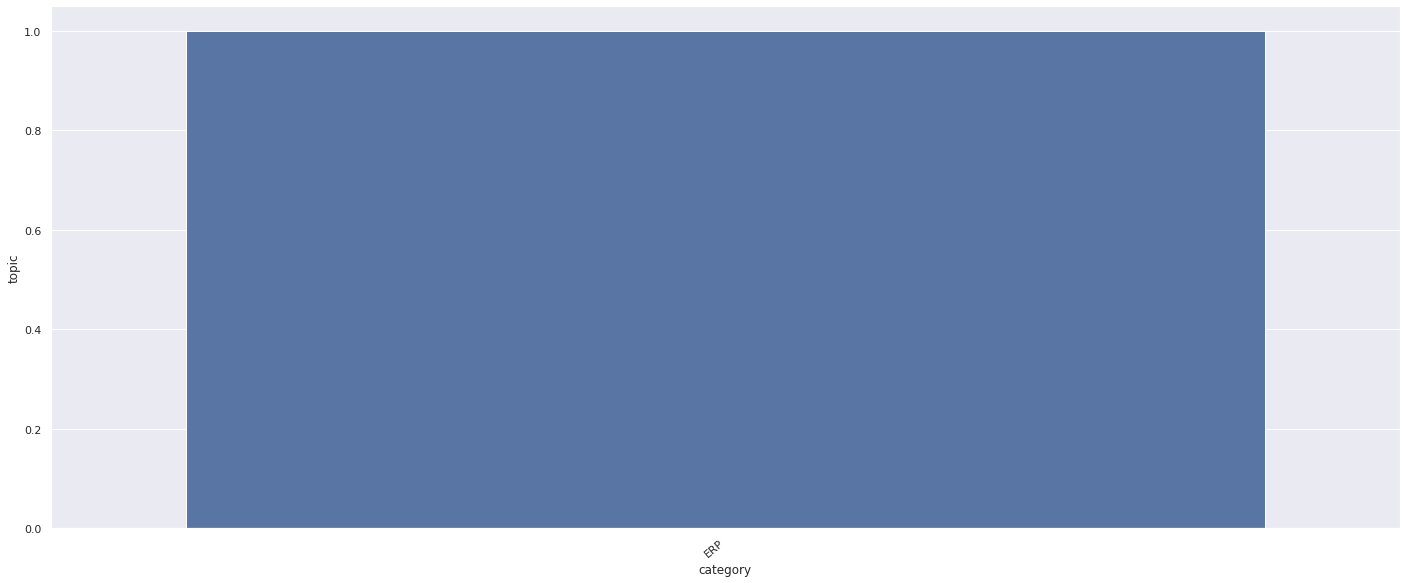


 ORG : metaps.com


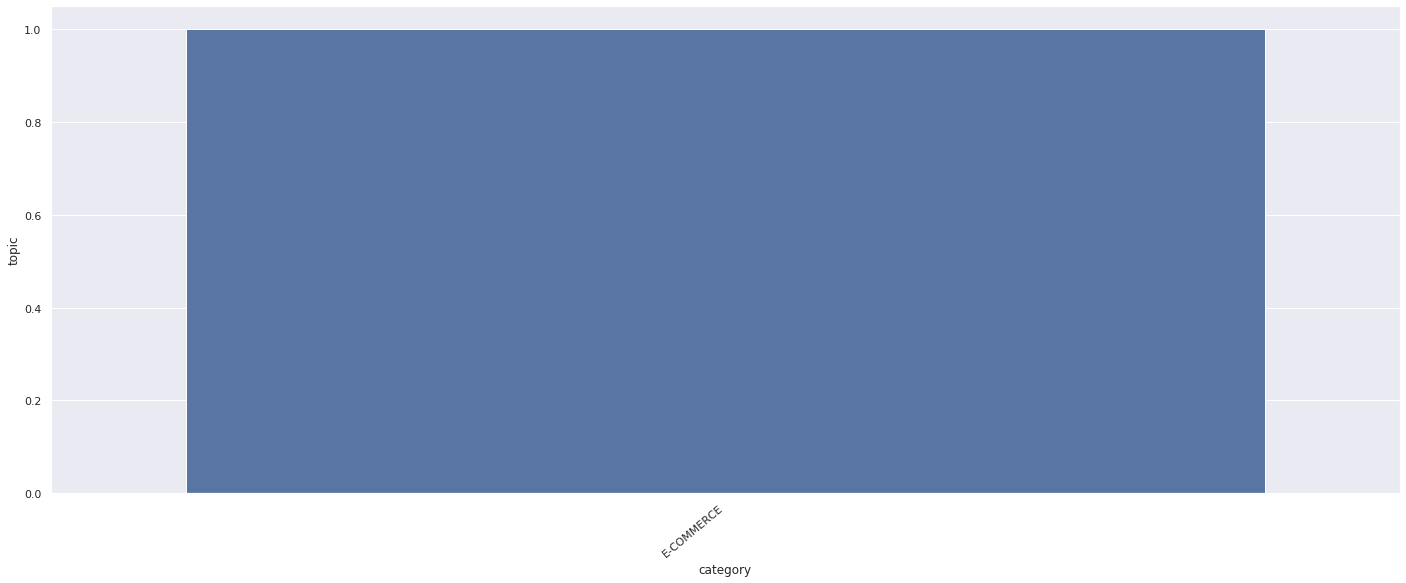


 ORG : amberg.ch


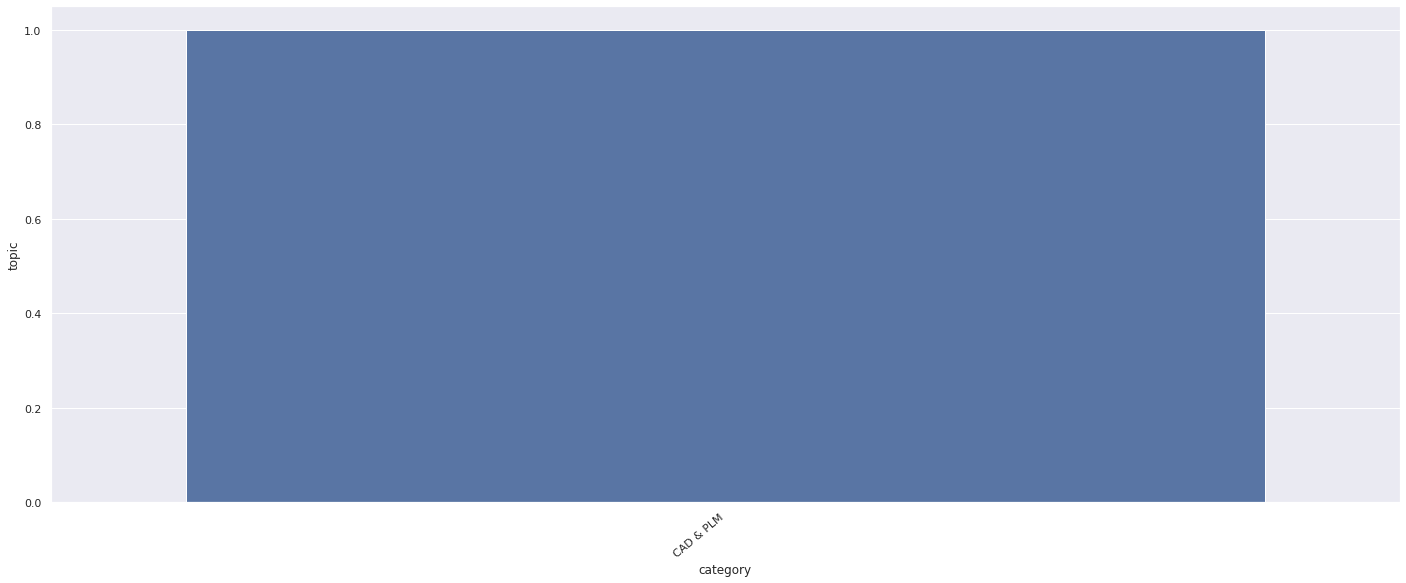

In [56]:
x = pd.DataFrame(None)
for org in org_df['global_url'].values:
    print(f' ORG : {org}')
    org_data_df = mal_data_df[mal_data_df['global_url'] == org]
#     print(org_data_df.groupby(by=['vendor','category'],as_index=False)\
#                             .count().sort_values('topic',ascending=False).head(10)[['vendor','category','topic']])
#     x['org'] = org
    x= org_data_df.groupby(by=['vendor','category'],as_index=False)\
                            .count().sort_values('topic',ascending=False).head(20)[['vendor','category','topic']]
    ax = sns.barplot(x='category',y='topic',data = x)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()
    print()


In [49]:
# ax = sns.barplot(x='category',y='topic',data = x)

# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# plt.tight_layout()
# plt.show()